In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
from scipy import stats
%matplotlib inline

In [73]:
dt=pd.read_csv('/Users/lhy/Documents/股票数据.csv',usecols=[0,1,2,4,7,9],encoding='gb18030')

数据的简单处理

In [74]:
dt.head(10)

,代码,简称,日期,开盘价(元),收盘价(元),成交金额(元)
0,600004.SH,白云机场,2003/4/28,4.6489,5.2692,1.512258e+09
1,600004.SH,白云机场,2003/4/29,5.1186,5.1126,6.358634e+08
2,600004.SH,白云机场,2003/4/30,5.1487,5.3354,7.100635e+08
3,600004.SH,白云机场,2003/5/12,5.2391,5.2270,3.088063e+08
4,600004.SH,白云机场,2003/5/13,5.2029,4.8717,3.257159e+08
5,600004.SH,白云机场,2003/5/14,4.8175,5.0283,2.534253e+08
6,600004.SH,白云机场,2003/5/15,5.0163,5.1487,2.368345e+08
7,600004.SH,白云机场,2003/5/16,5.1487,5.1548,3.072045e+08
8,600004.SH,白云机场,2003/5/19,5.1789,5.2692,4.075443e+08
9,600004.SH,白云机场,2003/5/20,5.2692,5.2270,1.477277e+08


In [75]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3186 entries, 0 to 3185
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   代码       3186 non-null   object 
 1   简称       3186 non-null   object 
 2   日期       3186 non-null   object 
 3   开盘价(元)   3186 non-null   float64
 4   收盘价(元)   3186 non-null   float64
 5   成交金额(元)  3136 non-null   float64
dtypes: float64(3), object(3)
memory usage: 149.5+ KB


In [76]:
dt.describe().T

,count,mean,std,min,25%,50%,75%,max
开盘价(元),3186.0,7.750165e+00,3.129561e+00,4.028400e+00,5.554825e+00,6.508100e+00,8.770575e+00,2.048000e+01
收盘价(元),3186.0,7.758905e+00,3.136228e+00,4.022400e+00,5.554325e+00,6.517500e+00,8.769100e+00,2.096000e+01
成交金额(元),3136.0,8.389502e+07,9.948407e+07,3.701710e+06,2.365751e+07,5.120372e+07,1.042663e+08,1.512258e+09


In [77]:
col=dt.columns.values
dt.columns=[x.strip() for x in col]
dt.columns

Index(['代码', '简称', '日期', '开盘价(元)', '收盘价(元)', '成交金额(元)'], dtype='object')

In [78]:
dt.isnull().sum()

代码          0
简称          0
日期          0
开盘价(元)      0
收盘价(元)      0
成交金额(元)    50
dtype: int64

In [79]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [80]:
deindex=dt[dt['成交金额(元)'].isnull()].index

In [81]:
dt.drop(index=deindex,inplace=True)

In [82]:
dt.index=range(dt.shape[0])

In [88]:
dtm=dt.日期.str[:7]
dt['月份']=[x.rstrip('/') for x in dtm]
dt.values

array([['600004.SH', '白云机场', '2003/4/28', ..., 5.2692, 1512258214.0,
        '2003/4'],
       ['600004.SH', '白云机场', '2003/4/29', ..., 5.1126, 635863436.0,
        '2003/4'],
       ['600004.SH', '白云机场', '2003/4/30', ..., 5.3354, 710063498.0,
        '2003/4'],
       ...,
       ['600004.SH', '白云机场', '2016/6/6', ..., 12.32, 75402815.0,
        '2016/6'],
       ['600004.SH', '白云机场', '2016/6/7', ..., 12.26, 35039721.0,
        '2016/6'],
       ['600004.SH', '白云机场', '2016/6/8', ..., 12.16, 47575218.0,
        '2016/6']], dtype=object)

In [84]:
i=0;
t=0;
avgbg=[];
for x in dt['月份']:
    if i+1 < dt['月份'].count():
        if x==dt['月份'][i+1]:
            if i+1==dt['月份'].count()-1:
                avgbg.append(dt[t:]['开盘价(元)'].mean())
            i=i+1;
        else:
            avgbg.append(dt[t:i+1]['开盘价(元)'].mean())
            t=i+1;
            i=i+1;
i=0;
t=0;
avgend=[];
for x in dt['月份']:
    if i+1 < dt['月份'].count():
        if x==dt['月份'][i+1]:
            if i+1==dt['月份'].count()-1:
                avgend.append(dt[t:]['收盘价(元)'].mean())
            i=i+1;
        else:
            avgend.append(dt[t:i+1]['收盘价(元)'].mean())
            t=i+1;
            i=i+1;
i=0;
t=0;
deal=[];
for x in dt['月份']:
    if i+1 < dt['月份'].count():
        if x==dt['月份'][i+1]:
            if i+1==dt['月份'].count()-1:
               deal.append(dt[t:]['成交金额(元)'].sum())
            i=i+1;
        else:
            deal.append(dt[t:i+1]['成交金额(元)'].sum())
            t=i+1;
            i=i+1;

In [85]:
ndt=dt.drop(columns=['日期','开盘价(元)','收盘价(元)','成交金额(元)'])
ndt.drop_duplicates(inplace=True)
ndt.index=range(ndt.shape[0])

In [86]:
ndt['平均开盘价(元)']=avgbg;
ndt['平均收盘价(元)']=avgend;
ndt['总成交金额(元)']=deal;
ndt

,代码,简称,月份,平均开盘价(元),平均收盘价(元),总成交金额(元)
0,600004.SH,白云机场,2003/4,4.972067,5.239067,2.858185e+09
1,600004.SH,白云机场,2003/5,5.276007,5.296487,4.231049e+09
2,600004.SH,白云机场,2003/6,5.515475,5.493185,1.808990e+09
3,600004.SH,白云机场,2003/7,5.472352,5.487543,1.907890e+09
4,600004.SH,白云机场,2003/8,5.401648,5.400800,4.970417e+08
5,600004.SH,白云机场,2003/9,5.234691,5.232768,5.479938e+08
6,600004.SH,白云机场,2003/10,5.019939,5.002872,6.516926e+08
7,600004.SH,白云机场,2003/11,4.982240,4.986450,7.699524e+08
8,600004.SH,白云机场,2003/12,5.286461,5.299813,1.456048e+09
9,600004.SH,白云机场,2004/1,5.738885,5.762508,1.781469e+09


数据可视化

<function matplotlib.pyplot.show(close=None, block=None)>

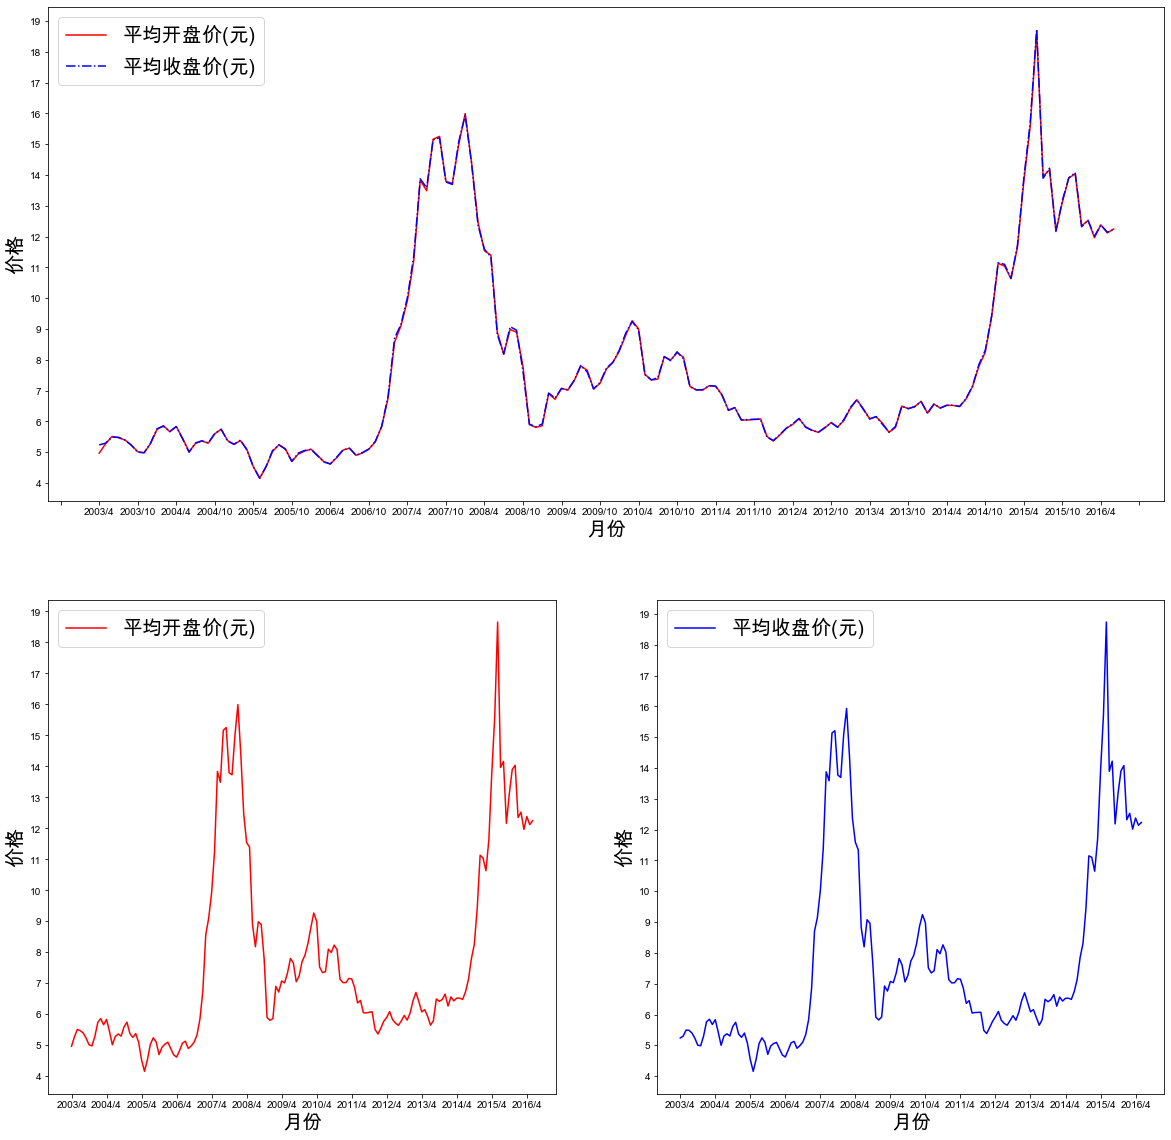

In [57]:
x=np.array(ndt['月份'])
ab=np.array(ndt['平均开盘价(元)'])
ae=np.array(ndt['平均收盘价(元)'])
plt.figure(figsize=(20,20))
ax1 = plt.subplot(211)
plt.plot(x,ab,color='r',linestyle='-',label='平均开盘价(元)')
plt.plot(x,ae,'b',linestyle='-.',label='平均收盘价(元)')
plt.legend(fontsize=20)
plt.xlabel('月份',fontsize=20)
plt.ylabel('价格',fontsize=20)
x_major_locator= MultipleLocator(6)
y_major_locator= MultipleLocator(1)
ax= plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
ax2 = plt.subplot(223)
plt.plot(x,ab,color='r',label='平均开盘价(元)')
x_major_locator= MultipleLocator(12)
y_major_locator= MultipleLocator(1)
ax= plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.legend(fontsize=20)
plt.xlabel('月份',fontsize=20)
plt.ylabel('价格',fontsize=20)
ax3 = plt.subplot(224)
plt.plot(x,ae,'b',label='平均收盘价(元)')
x_major_locator= MultipleLocator(12)
y_major_locator= MultipleLocator(1)
ax= plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.legend(fontsize=20)
plt.xlabel('月份',fontsize=20)
plt.ylabel('价格',fontsize=20)
plt.show

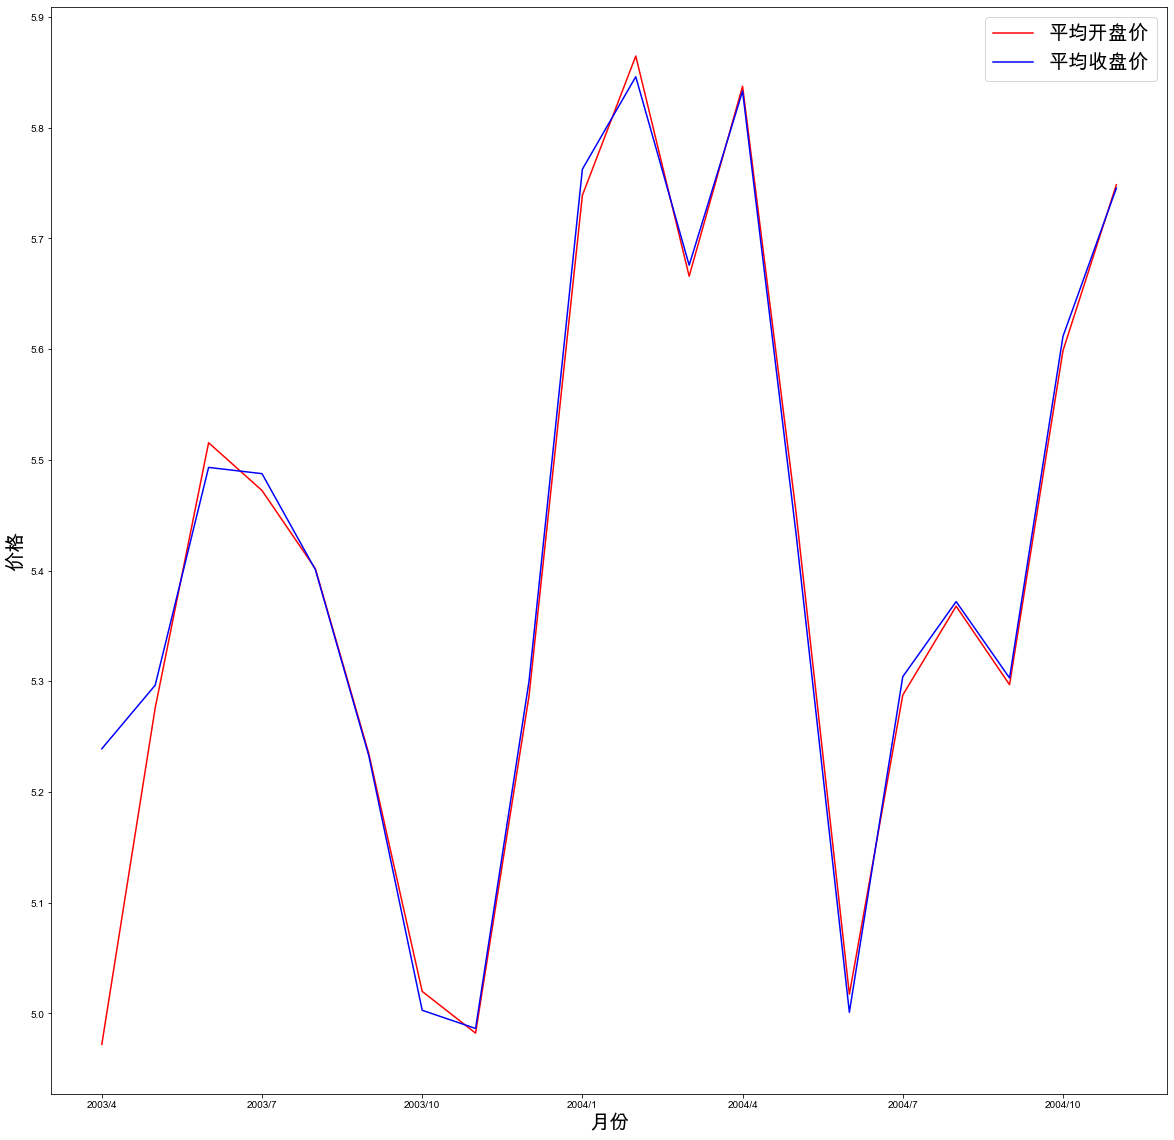

In [56]:
x1=np.array(ndt['月份'][:20])
ab1=np.array(ndt['平均开盘价(元)'][:20])
ae1=np.array(ndt['平均收盘价(元)'][:20])
plt.figure(figsize=(20,20))
plt.plot(x1,ab1,color='r',label='平均开盘价')
plt.plot(x1,ae1,'b',label='平均收盘价')
x_major_locator= MultipleLocator(3)
y_major_locator= MultipleLocator(0.1)
ax= plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.legend(fontsize=20)
plt.xlabel('月份',fontsize=20)
plt.ylabel('价格',fontsize=20)
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

<function matplotlib.pyplot.show(close=None, block=None)>

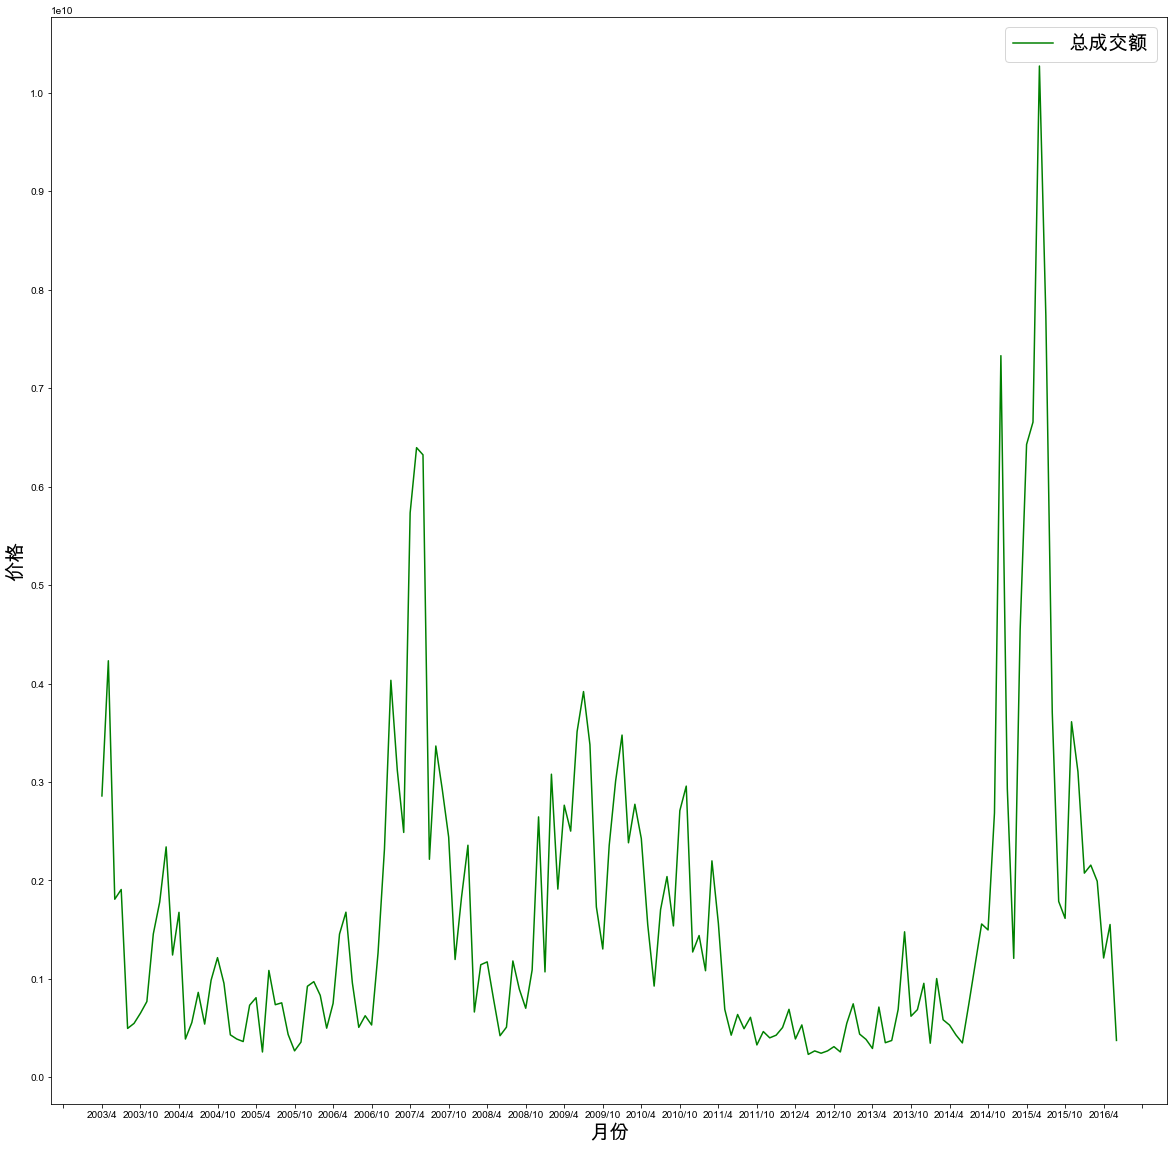

In [60]:
x2=np.array(ndt['月份'])
adeal=np.array(ndt['总成交金额(元)'])
plt.figure(figsize=(20,20))
plt.plot(x2,adeal,color='g',label='总成交额')
x_major_locator= MultipleLocator(6)
y_major_locator= MultipleLocator(1e9)
ax= plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.legend(fontsize=20)
plt.xlabel('月份',fontsize=20)
plt.ylabel('价格',fontsize=20)
plt.show

检验是否符合正态分布

In [64]:
u = ndt['总成交金额(元)'].mean()  # 计算均值
std = ndt['总成交金额(元)'].std()  # 计算标准差
stats.kstest(ndt['总成交金额(元)'], 'norm', (u, std)) #p值大于0.05为正态分布

KstestResult(statistic=0.19235046968821412, pvalue=1.2572797218762023e-05)

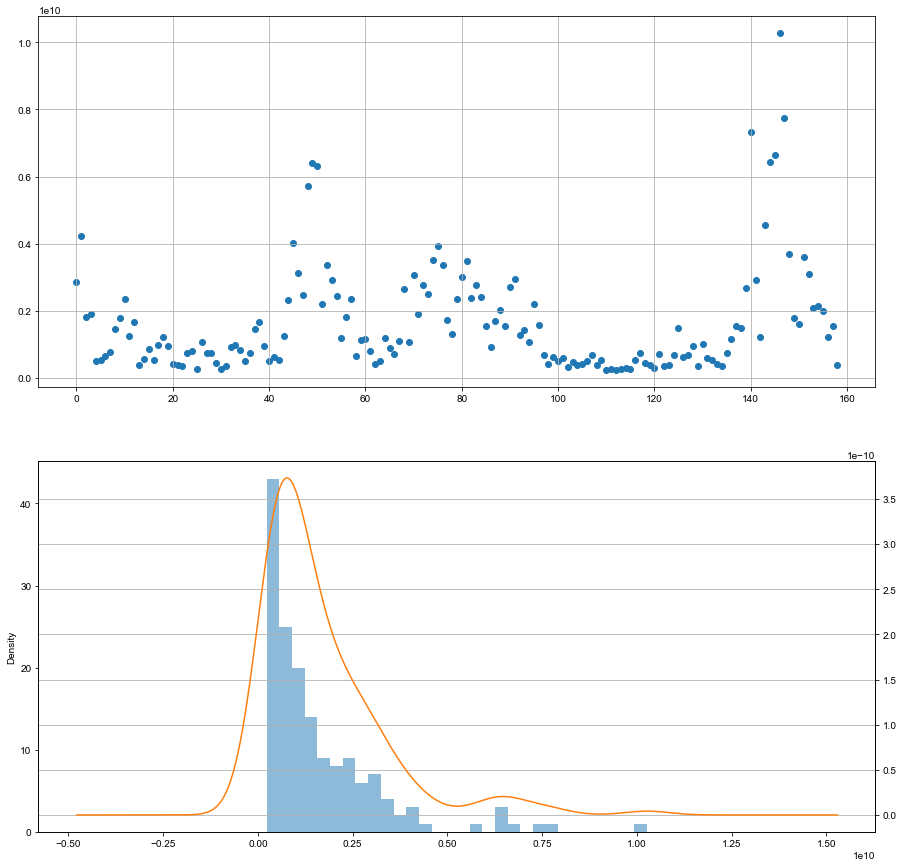

In [120]:
fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(2,1,1) 
ax1.scatter(ndt['总成交金额(元)'].index, ndt['总成交金额(元)'].values)
plt.grid()
ax2 = fig.add_subplot(2,1,2) 
ndt['总成交金额(元)'].hist(bins=30,alpha = 0.5,ax = ax2)
ndt['总成交金额(元)'].plot(kind = 'kde', secondary_y=True,ax = ax2)
plt.grid()

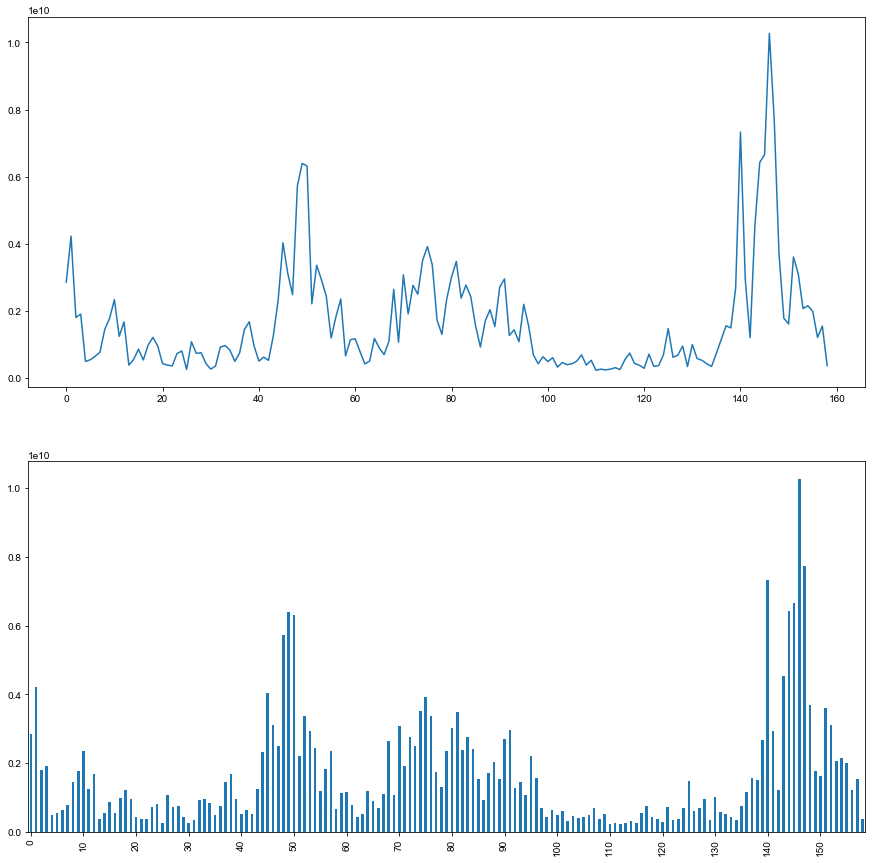

In [130]:
fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(2,1,1) 
ndt['总成交金额(元)'].plot(kind = 'line',ax=ax1)
ax2 = fig.add_subplot(2,1,2) 
ndt['总成交金额(元)'].plot(kind = 'bar',ax=ax2)
x_major_locator= MultipleLocator(10)
ax= plt.gca()
ax.xaxis.set_major_locator(x_major_locator)

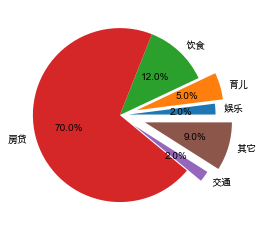

In [138]:
labels = ['娱乐','育儿','饮食','房贷','交通','其它']
sizes = [2,5,12,70,2,9]
explode = [0.1,0.2,0,0,0.2,0.3]
plt.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=False)
plt.show()  

